<a href="https://colab.research.google.com/github/Cvelsen22/Carmelo-Velez---Data-Analysis-Portfolio/blob/main/USA_car_safe_policy_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1.	Load and show this data Set in programing language of your preference (R, python, go, SQL, PL/Sql, etc.)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
raw_data = pd.read_excel("TESTING BD.xlsx", header= 0)

In [ ]:
raw_data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2.763519e+09,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,3.848111e+08,Two-Door Car,Medsize
1,QZ44356,Arizona,6.979536e+09,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1.131465e+09,Four-Door Car,Medsize
2,AI49188,Nevada,1.288743e+09,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,5.664722e+08,Two-Door Car,Medsize
3,WW63253,California,7.645862e+09,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,5.298813e+08,SUV,Medsize
4,HB64268,Washington,2.813693e+09,No,Basic,Bachelor,2011-03-02 00:00:00,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,1.381309e+08,Four-Door Car,Medsize


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
def convert_columns_to_category(df, *columns):
    """
    Converts specified columns of a DataFrame to the category type.

    Args:
        df (pandas.DataFrame): The DataFrame containing the columns.
        *columns: Variable number of column names to convert.

    Returns:
        pandas.DataFrame: The DataFrame with specified columns converted to the category type.
    """
    df_copy = df.copy()  # Create a copy of the DataFrame to avoid modifying the original

    for col in columns:
        if col in df_copy.columns:
            df_copy[col] = df_copy[col].astype('category')

    return df_copy

In [ ]:
columns_data = convert_columns_to_category(raw_data, 'Customer', 'State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size')

In [ ]:
columns_data['Effective To Date'] = pd.to_datetime(columns_data['Effective To Date'])

In [ ]:
print(columns_data.dtypes)

Customer                               category
State                                  category
Customer Lifetime Value                 float64
Response                               category
Coverage                               category
Education                              category
Effective To Date                datetime64[ns]
EmploymentStatus                       category
Gender                                 category
Income                                    int64
Location Code                          category
Marital Status                         category
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                            category
Policy                                 category
Renew Offer Type                       category
Sales Channel                          c

In [ ]:
df = columns_data
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2.763519e+09,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,3.848111e+08,Two-Door Car,Medsize
1,QZ44356,Arizona,6.979536e+09,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1.131465e+09,Four-Door Car,Medsize
2,AI49188,Nevada,1.288743e+09,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,5.664722e+08,Two-Door Car,Medsize
3,WW63253,California,7.645862e+09,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,5.298813e+08,SUV,Medsize
4,HB64268,Washington,2.813693e+09,No,Basic,Bachelor,2011-03-02,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,1.381309e+08,Four-Door Car,Medsize


In [ ]:
df.shape

(9134, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   category      
 1   State                          9134 non-null   category      
 2   Customer Lifetime Value        9134 non-null   float64       
 3   Response                       9134 non-null   category      
 4   Coverage                       9134 non-null   category      
 5   Education                      9134 non-null   category      
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   category      
 8   Gender                         9134 non-null   category      
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   category      
 11  Marital Status   

###a.	analyze it to understand how different customers behave and react to different marketing strategies.

In [ ]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9.134000e+03,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9.134000e+03
mean,4.189149e+09,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,2.052024e+08
std,2.629397e+09,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,3.001535e+08
min,2.395570e+03,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,9.900700e-02
25%,2.195449e+09,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,5.088000e+02
50%,3.935621e+09,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,5.185041e+07
75%,5.989774e+09,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,3.390134e+08
max,9.988788e+09,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2.893240e+09


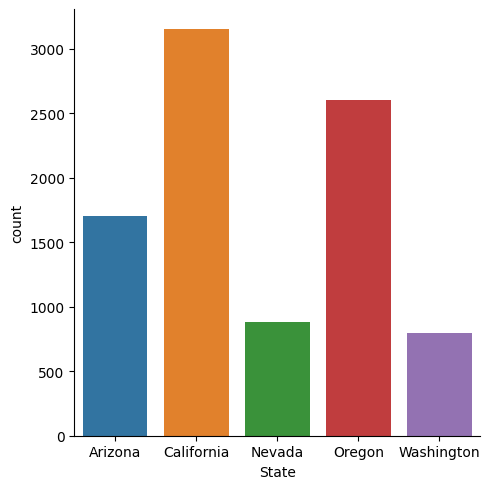

In [ ]:
# Create count plot of States
sns.catplot(x="State",data=df, kind="count")


# Show plot
plt.show()

In [ ]:
df['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [ ]:
# For each Response, aggregate Renew Offer Type and Vehicle Class: get count
policy_by_Stage = df.groupby("State")[["Policy Type", "Policy"]].value_counts()
print(policy_by_Stage.unstack())

Policy                     Corporate L1  Corporate L2  Corporate L3  \
State      Policy Type                                                
Arizona    Corporate Auto            58           106           169   
           Personal Auto              0             0             0   
           Special Auto               0             0             0   
California Corporate Auto           148           225           366   
           Personal Auto              0             0             0   
           Special Auto               0             0             0   
Nevada     Corporate Auto            32            61           102   
           Personal Auto              0             0             0   
           Special Auto               0             0             0   
Oregon     Corporate Auto            85           161           294   
           Personal Auto              0             0             0   
           Special Auto               0             0             0   
Washin

In [ ]:
df['State'].value_counts(normalize = True)

California    0.344865
Oregon        0.284760
Arizona       0.186446
Nevada        0.096562
Washington    0.087366
Name: State, dtype: float64

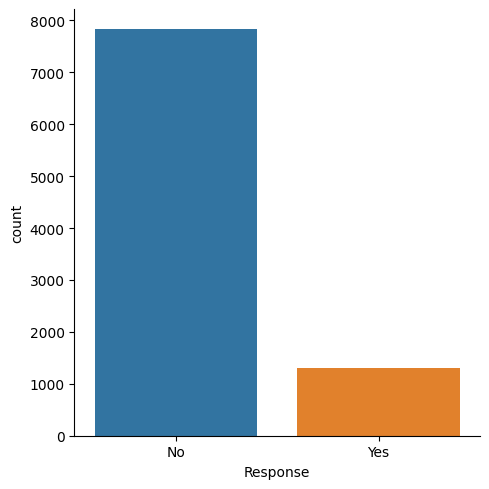

In [ ]:
# Create count plot of Response usage
sns.catplot(x="Response",data=df, kind="count")


# Show plot
plt.show()

In [ ]:
df['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

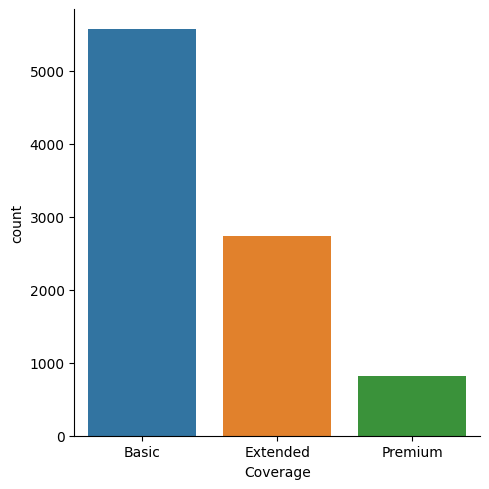

In [ ]:
# Create count plot of Coverage usage
sns.catplot(x="Coverage",data=df, kind="count")


# Show plot
plt.show()

In [ ]:
df['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

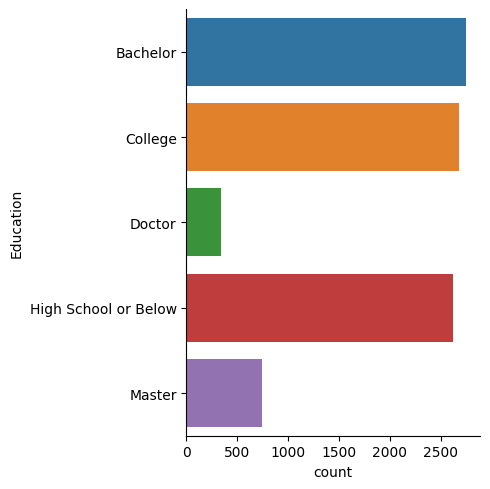

In [ ]:
# Create count plot of Education cx
sns.catplot(y="Education",data=df, kind="count")


# Show plot
plt.show()

In [ ]:
df['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

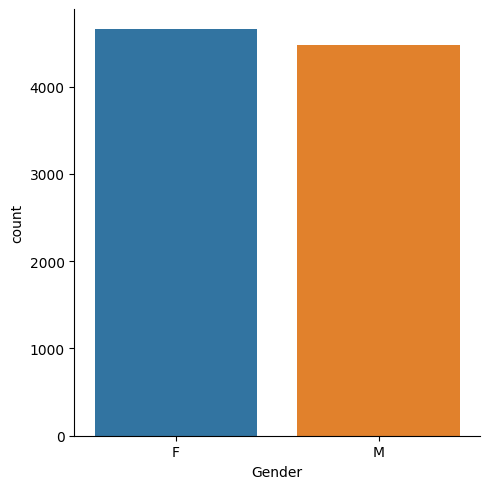

In [ ]:
# Create count plot of cx Gender
sns.catplot(x="Gender",data=df, kind="count")


# Show plot
plt.show()

In [ ]:
df['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

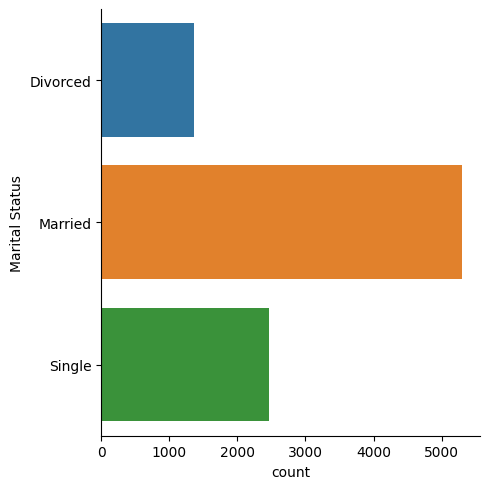

In [ ]:
# Create count plot of cx Marital Status
sns.catplot(y="Marital Status",data=df, kind="count")


# Show plot
plt.show()

In [ ]:
df['Marital Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

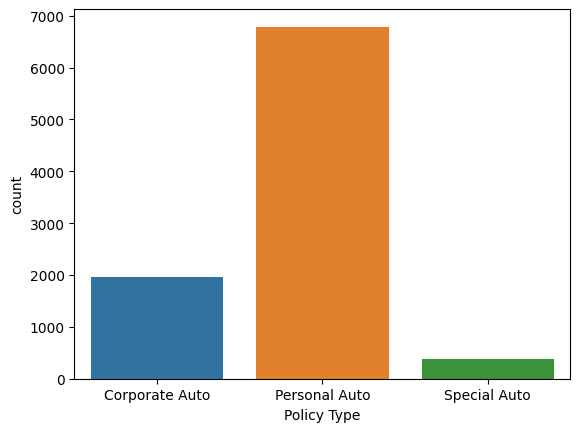

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data=df,
              x="Policy Type")

plt.show()
plt.clf()

In [ ]:
df['Policy Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

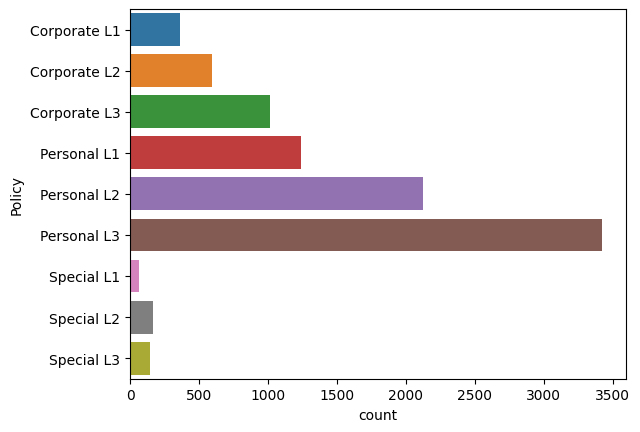

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data=df,
              y="Policy")

plt.show()
plt.clf()

In [ ]:
df['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

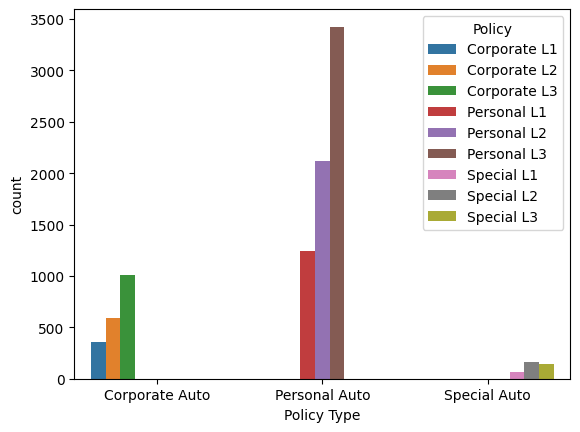

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data=df,
              x="Policy Type",
              hue="Policy")

plt.show()
plt.clf()

In [ ]:
policy_by_policy_type = df.groupby("Policy Type")["Policy"].value_counts()
print(policy_by_policy_type.unstack())

Policy          Corporate L1  Corporate L2  Corporate L3  Personal L1  \
Policy Type                                                             
Corporate Auto           359           595          1014            0   
Personal Auto              0             0             0         1240   
Special Auto               0             0             0            0   

Policy          Personal L2  Personal L3  Special L1  Special L2  Special L3  
Policy Type                                                                   
Corporate Auto            0            0           0           0           0  
Personal Auto          2122         3426           0           0           0  
Special Auto              0            0          66         164         148  


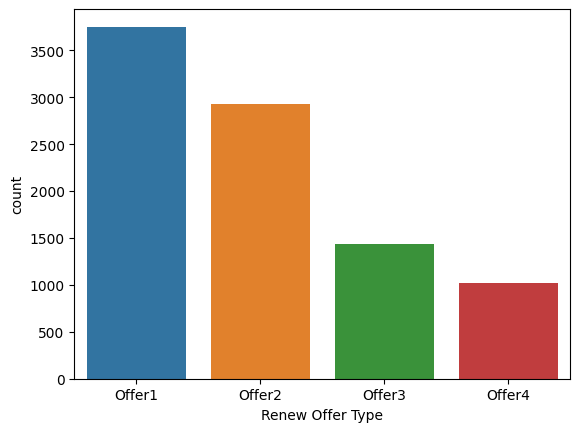

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data=df,
              x="Renew Offer Type")

plt.show()
plt.clf()

In [ ]:
df['Renew Offer Type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64

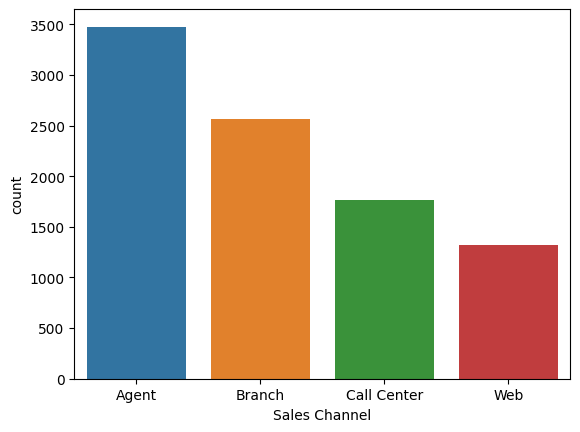

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data=df,
              x="Sales Channel")

plt.show()
plt.clf()

In [ ]:
df['Sales Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [ ]:
df['Sales Channel'].value_counts(normalize = True)

Agent          0.380666
Branch         0.281038
Call Center    0.193234
Web            0.145062
Name: Sales Channel, dtype: float64

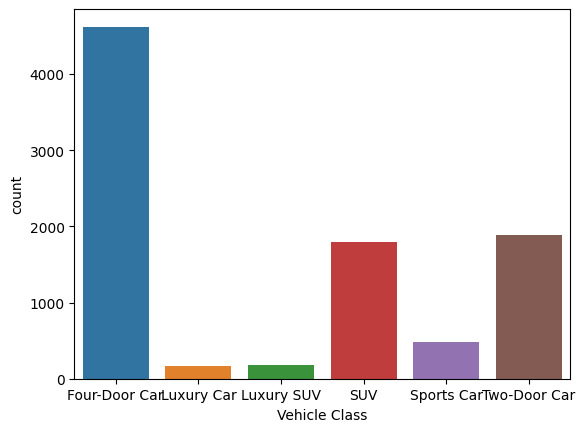

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data=df,
              x="Vehicle Class")

plt.show()
plt.clf()

In [ ]:
df['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

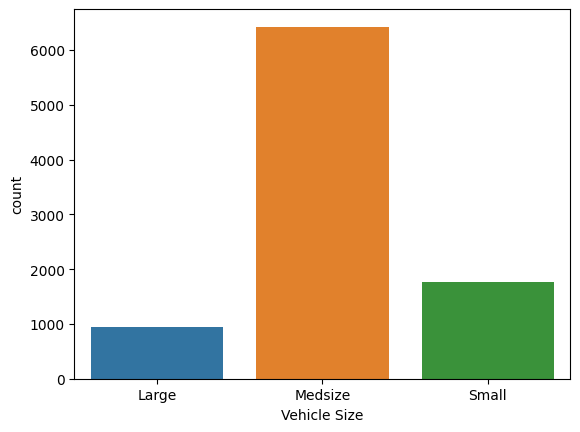

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data=df,
              x="Vehicle Size")

plt.show()
plt.clf()

In [ ]:
df['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

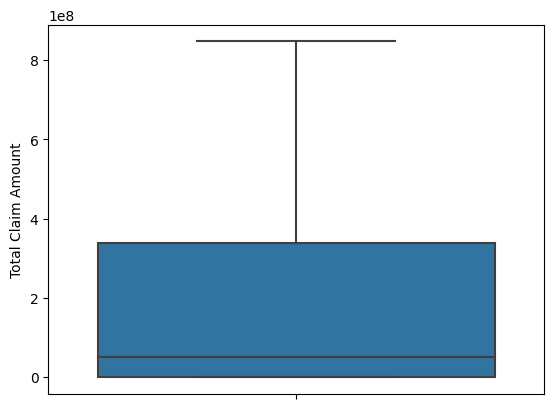

In [ ]:
# Create a boxplot of Total Claim Amount
sns.boxplot(data=df, y="Total Claim Amount",sym="")
plt.show()

In [ ]:
df['Total Claim Amount'].describe()

count    9.134000e+03
mean     2.052024e+08
std      3.001535e+08
min      9.900700e-02
25%      5.088000e+02
50%      5.185041e+07
75%      3.390134e+08
max      2.893240e+09
Name: Total Claim Amount, dtype: float64

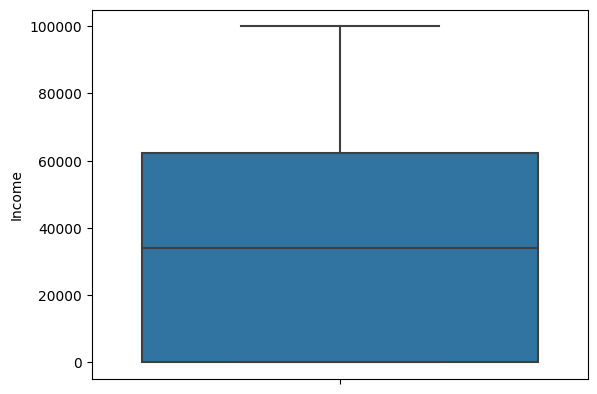

In [ ]:
# Create a boxplot of Income
sns.boxplot(data=df, y="Income")
plt.show()

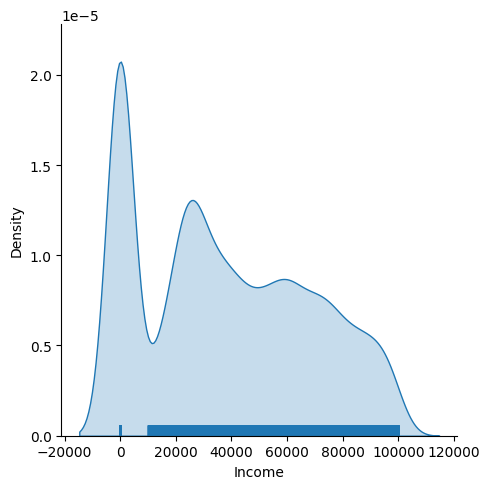

In [ ]:
# Create a displot of cx Income
sns.displot(df['Income'],
             kind='kde',
             rug=True,
             fill=True)

# Plot the results
plt.show()

In [ ]:
df['Income'].describe()

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: Income, dtype: float64

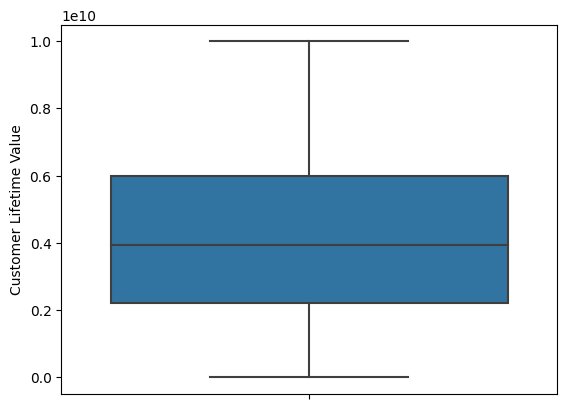

In [ ]:
# Create a boxplot of Customer Lifetime Value
sns.boxplot(data=df, y="Customer Lifetime Value",sym="")
plt.show()

In [ ]:
df['Customer Lifetime Value'].describe()

count    9.134000e+03
mean     4.189149e+09
std      2.629397e+09
min      2.395570e+03
25%      2.195449e+09
50%      3.935621e+09
75%      5.989774e+09
max      9.988788e+09
Name: Customer Lifetime Value, dtype: float64

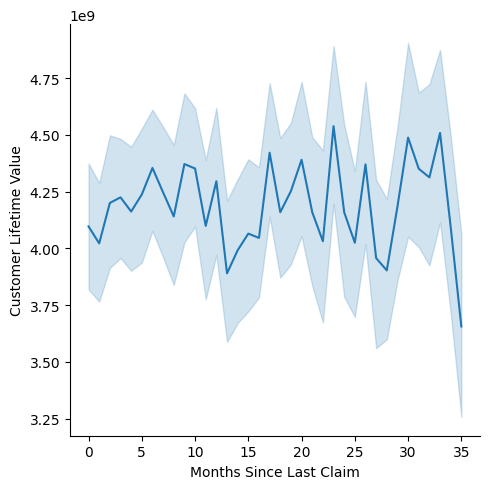

In [ ]:
# Create line plot
sns.relplot(x="Months Since Last Claim",y="Customer Lifetime Value",data=df,kind="line")


# Show plot
plt.show()

In [ ]:
# Print the maximum of Number of Open Complaints column
print(df["Number of Open Complaints"].max())

5


In [ ]:
# Print the maximum of the Income column
print(df["Income"].max())

99981


In [ ]:
# Sort sales_1_1 by date
sort_by_date = df.sort_values("Effective To Date")
sort_by_date.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
4379,RH97231,Washington,8.693996e+09,No,Basic,Bachelor,2011-01-01,Employed,M,48893,...,26,0,3,Personal Auto,Personal L3,Offer1,Branch,78788953.0,SUV,Medsize
904,VU53417,Arizona,3.837358e+09,No,Extended,High School or Below,2011-01-01,Medical Leave,M,23051,...,86,0,1,Personal Auto,Personal L1,Offer1,Agent,475.2,Two-Door Car,Medsize
3639,ST78006,Oregon,4.594264e+09,No,Basic,High School or Below,2011-01-01,Unemployed,F,0,...,10,1,3,Personal Auto,Personal L2,Offer4,Call Center,139331764.0,Four-Door Car,Medsize
3637,UK29448,Oregon,2.467460e+09,No,Basic,Bachelor,2011-01-01,Unemployed,M,0,...,14,0,1,Personal Auto,Personal L2,Offer1,Agent,525.6,Two-Door Car,Medsize
6552,TU67471,Washington,2.009689e+09,Yes,Basic,High School or Below,2011-01-01,Employed,F,92766,...,15,0,2,Personal Auto,Personal L2,Offer2,Agent,379029102.0,Two-Door Car,Large


In [ ]:
# Set the index of temperatures to city
date_ind = df.set_index("Effective To Date")
date_ind.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Effective To Date,,,,,,,,,,,,,,,,,,,,,
2011-02-24,BU79786,Washington,2.763519e+09,No,Basic,Bachelor,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,3.848111e+08,Two-Door Car,Medsize
2011-01-31,QZ44356,Arizona,6.979536e+09,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1.131465e+09,Four-Door Car,Medsize
2011-02-19,AI49188,Nevada,1.288743e+09,No,Premium,Bachelor,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,5.664722e+08,Two-Door Car,Medsize
2011-01-20,WW63253,California,7.645862e+09,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,5.298813e+08,SUV,Medsize
2011-03-02,HB64268,Washington,2.813693e+09,No,Basic,Bachelor,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,1.381309e+08,Four-Door Car,Medsize


In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
# Sort the index of date_ind
date_ind_sorted = date_ind.sort_index()
date_ind_sorted.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Effective To Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,RH97231,Washington,8.693996e+09,No,Basic,Bachelor,Employed,M,48893,Suburban,...,26,0,3,Personal Auto,Personal L3,Offer1,Branch,78788953.0,SUV,Medsize
2011-01-01,VU53417,Arizona,3.837358e+09,No,Extended,High School or Below,Medical Leave,M,23051,Suburban,...,86,0,1,Personal Auto,Personal L1,Offer1,Agent,475.2,Two-Door Car,Medsize
2011-01-01,ST78006,Oregon,4.594264e+09,No,Basic,High School or Below,Unemployed,F,0,Rural,...,10,1,3,Personal Auto,Personal L2,Offer4,Call Center,139331764.0,Four-Door Car,Medsize
2011-01-01,UK29448,Oregon,2.467460e+09,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,14,0,1,Personal Auto,Personal L2,Offer1,Agent,525.6,Two-Door Car,Medsize
2011-01-01,TU67471,Washington,2.009689e+09,Yes,Basic,High School or Below,Employed,F,92766,Suburban,...,15,0,2,Personal Auto,Personal L2,Offer2,Agent,379029102.0,Two-Door Car,Large


In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

###b.	Get the total number of customers who have responded

In [ ]:
df['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

###c.	Visualize this in a bar plot

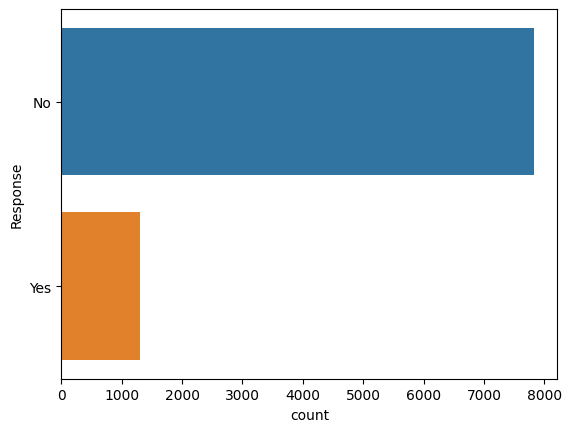

<Figure size 640x480 with 0 Axes>

In [ ]:
# Show a countplot with the number of responses
sns.countplot(data=df,
              y="Response")

plt.show()
plt.clf()

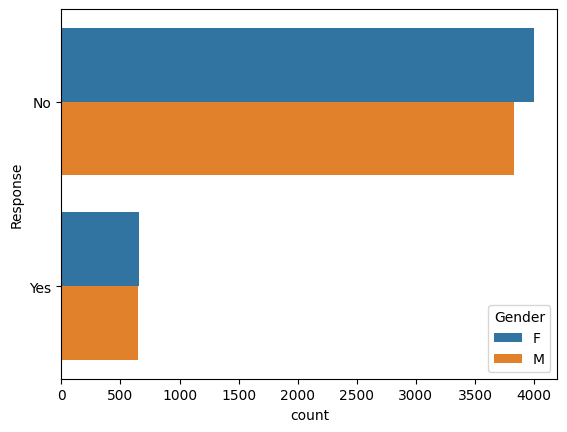

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data=df,
              y="Response",
              hue="Gender")

plt.show()
plt.clf()

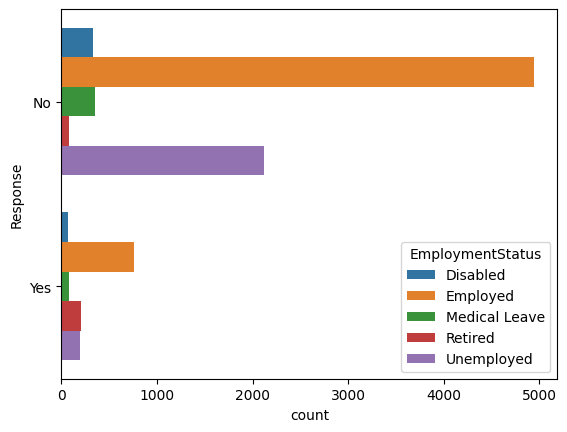

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data=df,
              y="Response",
              hue="EmploymentStatus")

plt.show()
plt.clf()

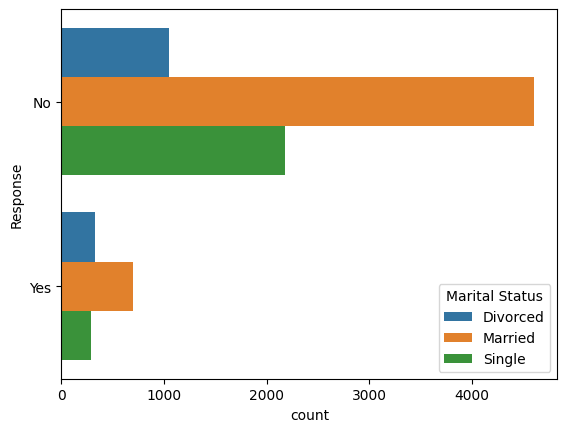

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data=df,
              y="Response",
              hue="Marital Status")

plt.show()
plt.clf()

###d.	Calculate the percentages of the engaged and non-engaged customers

In [ ]:
df['Response'].value_counts(normalize = True)

No     0.856799
Yes    0.143201
Name: Response, dtype: float64

###f.	Show count only engaged customers

In [ ]:
engaged_customers = df[(df["Response"] =="Yes")]
engaged_customers['Response'].value_counts()

Yes    1308
No        0
Name: Response, dtype: int64

###g.	Show engaged customers grouped by renewal offer type

In [ ]:
engaged_cx_by_renewal_offer = df.groupby("Renew Offer Type")["Response"].value_counts()
print(engaged_cx_by_renewal_offer)

Renew Offer Type  Response
Offer1            No          3158
                  Yes          594
Offer2            No          2242
                  Yes          684
Offer3            No          1402
                  Yes           30
Offer4            No          1024
                  Yes            0
Name: Response, dtype: int64


###h.	Visualize it in a bar plot

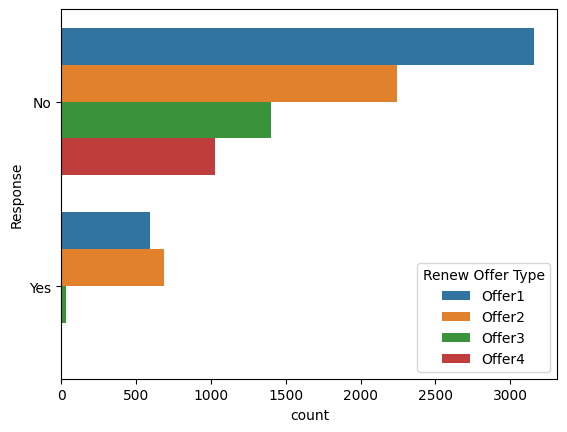

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data=df,
              y="Response",
              hue="Renew Offer Type")

plt.show()
plt.clf()

###i.	understand how customers with different attributes respond differently to different marketing messages. We start looking at the engagements rates by each offer type and vehicle

In [ ]:
# For each Response, aggregate Renew Offer Type and Vehicle Class: get count
engagements_rates_x_Renew_Offer_and_Vehicle_Class = df.groupby("Response")[["Renew Offer Type", "Vehicle Class"]].value_counts()
print(engagements_rates_x_Renew_Offer_and_Vehicle_Class)

Response  Renew Offer Type  Vehicle Class
No        Offer1            Four-Door Car    1533
          Offer2            Four-Door Car    1197
          Offer1            SUV               724
          Offer3            Four-Door Car     721
          Offer1            Two-Door Car      583
          Offer4            Four-Door Car     546
          Offer2            Two-Door Car      509
                            SUV               360
          Offer3            Two-Door Car      279
                            SUV               276
          Offer4            Two-Door Car      251
          Offer1            Sports Car        185
          Offer4            SUV               148
          Offer2            Sports Car        106
          Offer1            Luxury SUV         71
          Offer3            Sports Car         68
          Offer1            Luxury Car         62
          Offer2            Luxury SUV         35
                            Luxury Car         35
        

###j.	Make the previous output more readable using unstack function

In [ ]:
unstacked_engagements_rates_x_Renew_Offer_and_Vehicle_Class = engagements_rates_x_Renew_Offer_and_Vehicle_Class.unstack()
print(unstacked_engagements_rates_x_Renew_Offer_and_Vehicle_Class)

Vehicle Class              Four-Door Car  Luxury Car  Luxury SUV  SUV  \
Response Renew Offer Type                                               
No       Offer1                     1533          62          71  724   
         Offer2                     1197          35          35  360   
         Offer3                      721          31          27  276   
         Offer4                      546          23          21  148   
Yes      Offer1                      264           6          18  168   
         Offer2                      336           6          12  120   
         Offer3                       24           0           0    0   
         Offer4                        0           0           0    0   

Vehicle Class              Sports Car  Two-Door Car  
Response Renew Offer Type                            
No       Offer1                   185           583  
         Offer2                   106           509  
         Offer3                    68           279  

###k.	create a pivot the data and extract and transform the inner-level groups to columns

In [ ]:
df_engagements_rates_x_Renew_Offer_and_Vehicle_Class = engagements_rates_x_Renew_Offer_and_Vehicle_Class.reset_index(name='Engagement Count')

In [ ]:
# Create a pivot table for visualization
pivot_table = df_engagements_rates_x_Renew_Offer_and_Vehicle_Class.pivot_table(index='Response', columns=['Renew Offer Type', 'Vehicle Class'], values='Engagement Count', fill_value=0)

print(pivot_table)

Renew Offer Type        Offer1                                        \
Vehicle Class    Four-Door Car Luxury Car Luxury SUV  SUV Sports Car   
Response                                                               
No                        1533         62         71  724        185   
Yes                        264          6         18  168         42   

Renew Offer Type                     Offer2                             ...  \
Vehicle Class    Two-Door Car Four-Door Car Luxury Car Luxury SUV  SUV  ...   
Response                                                                ...   
No                        583          1197         35         35  360  ...   
Yes                        96           336          6         12  120  ...   

Renew Offer Type     Offer3                                     Offer4  \
Vehicle Class    Luxury SUV  SUV Sports Car Two-Door Car Four-Door Car   
Response                                                                 
No                   

###l.	Visualize this data in bar plot

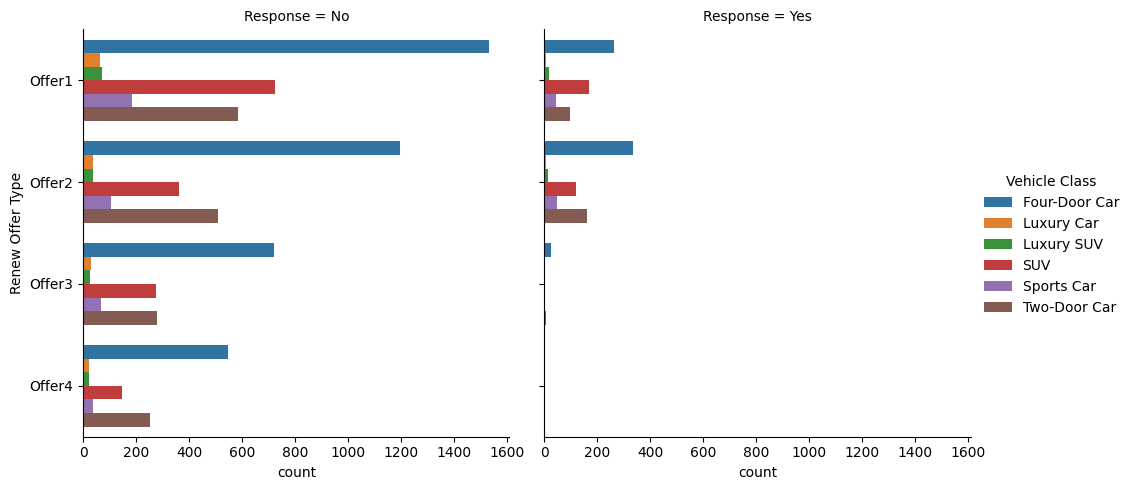

In [ ]:
g = sns.catplot(y="Renew Offer Type",
                hue="Vehicle Class",
                data=df, kind="count",
                col="Response")

# Show plot
plt.show()

###2.	analyze how engagement rates differ by different sales channels.

In [ ]:
engaged_cx_by_Sales_Channel = df.groupby("Sales Channel")["Response"].value_counts()
print(engaged_cx_by_Sales_Channel)

Sales Channel  Response
Agent          No          2811
               Yes          666
Branch         No          2273
               Yes          294
Call Center    No          1573
               Yes          192
Web            No          1169
               Yes          156
Name: Response, dtype: int64


In [ ]:
unstacked_engaged_cx_by_Sales_Channel = engaged_cx_by_Sales_Channel.unstack()
print(unstacked_engaged_cx_by_Sales_Channel)

Response         No  Yes
Sales Channel           
Agent          2811  666
Branch         2273  294
Call Center    1573  192
Web            1169  156


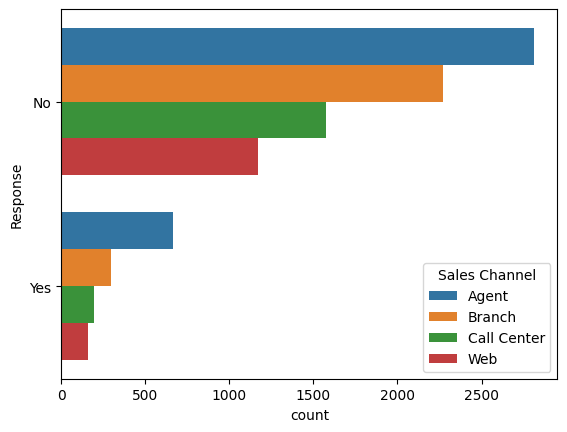

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data=df,
              y="Response",
              hue="Sales Channel")

plt.show()
plt.clf()

###3.	Show if whether customers with various vehicle sizes respond differently to different sales channels.

In [ ]:
# For each Response, aggregate Renew Offer Type and Vehicle Class: get count
engagements_rates_x_Sales_Channel_and_Vehicle_Size = df.groupby("Response")[["Sales Channel", "Vehicle Size"]].value_counts()
print(engagements_rates_x_Sales_Channel_and_Vehicle_Size)

Response  Sales Channel  Vehicle Size
No        Agent          Medsize         1967
          Branch         Medsize         1588
          Call Center    Medsize         1098
          Web            Medsize          829
          Agent          Small            575
          Branch         Small            448
          Call Center    Small            314
          Agent          Large            269
          Branch         Large            237
          Web            Small            229
          Call Center    Large            161
          Web            Large            111
Yes       Agent          Medsize          504
          Branch         Medsize          192
          Web            Medsize          126
          Call Center    Medsize          120
          Agent          Small             90
                         Large             72
          Branch         Large             54
                         Small             48
          Call Center    Small            

###4.	Unstack the data into a more visible format (your choice)

In [ ]:
unstacked_engagements_rates_x_Sales_Channel_and_Vehicle_Size = engagements_rates_x_Sales_Channel_and_Vehicle_Size.unstack()
print(unstacked_engagements_rates_x_Sales_Channel_and_Vehicle_Size)

Vehicle Size            Large  Medsize  Small
Response Sales Channel                       
No       Agent            269     1967    575
         Branch           237     1588    448
         Call Center      161     1098    314
         Web              111      829    229
Yes      Agent             72      504     90
         Branch            54      192     48
         Call Center       24      120     48
         Web               18      126     12


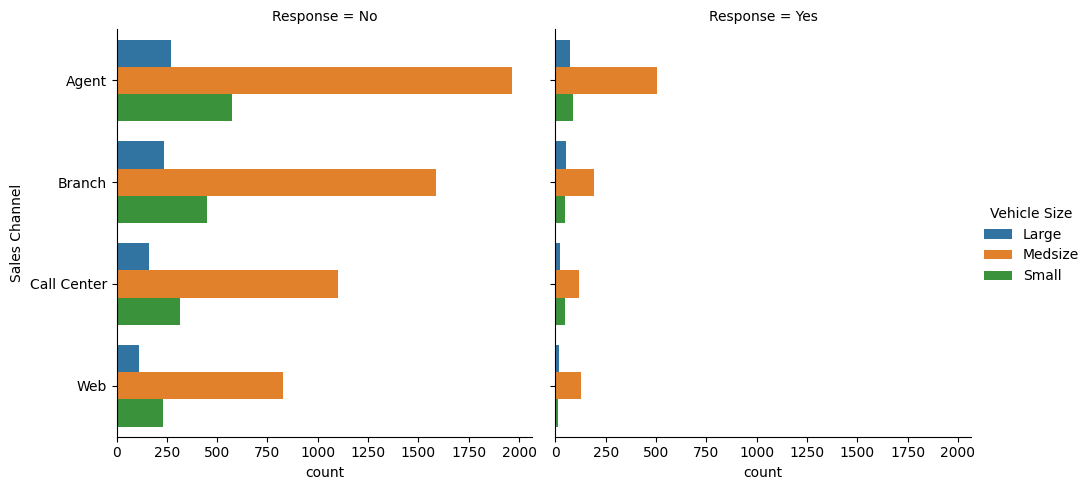

In [ ]:
# Adjust to add subplots per Response
y = sns.catplot(y="Sales Channel",
                hue="Vehicle Size",
                data=df, kind="count",
                col="Response")

# Show plot
plt.show()

###5.	show engagement rates by months since policy inception and plot

In [ ]:
Response_summary = df.groupby("Response").agg(
    # Create the mean_rate_Months_Since_Policy_Inception_column
    mean_rate_Months_Since_Policy_Inception=("Months Since Policy Inception", "mean"),
    # Create the std_rate_Months_Since_Policy_Inception_column
    std_rate_Months_Since_Policy_Inception=("Months Since Policy Inception", "std")
)
print(Response_summary)

          mean_rate_Months_Since_Policy_Inception  \
Response                                            
No                                      48.030923   
Yes                                     48.266055   

          std_rate_Months_Since_Policy_Inception  
Response                                          
No                                     28.044644  
Yes                                    27.071152  


In [ ]:
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

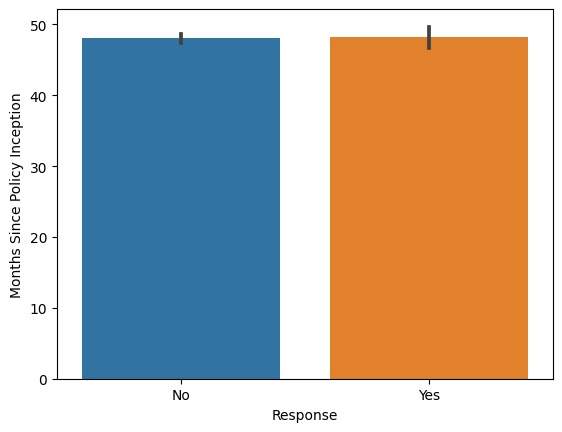

In [ ]:
# Create a bar plot of Response and Months Since Policy Inception
sns.barplot(data=df, x="Response", y="Months Since Policy Inception")
plt.show()

Min: 0 Max: 99


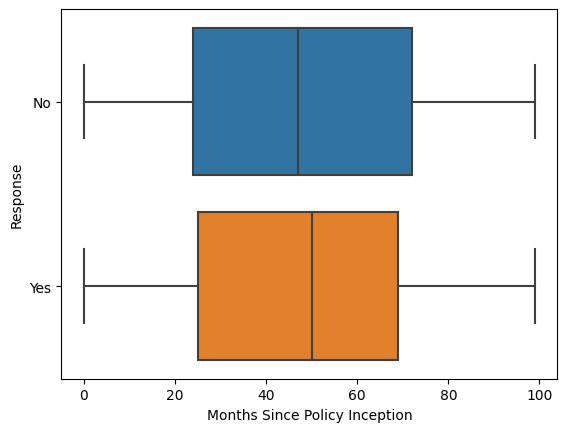

In [ ]:
# Print the minimum and maximum Months Since Policy Inception
print("Min:",df["Months Since Policy Inception"].min(), "Max:",df["Months Since Policy Inception"].max())

# Create a boxplot of Months Since Policy Inception
sns.boxplot(data=df, x="Months Since Policy Inception", y="Response")
plt.show()

In [ ]:
# Find the 25th percentile
twenty_fifth = df["Months Since Policy Inception"].quantile(0.25)

# Save the median
Months_Since_Last_Claim_median = df["Months Since Policy Inception"].median()

# Gather the 75th percentile
seventy_fifth = df["Months Since Policy Inception"].quantile(0.75)
print(twenty_fifth, Months_Since_Last_Claim_median, seventy_fifth)

24.0 48.0 71.0


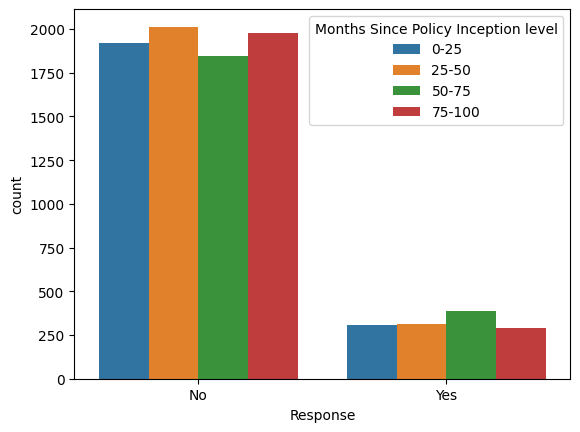

In [ ]:
# Create Months Since Last Claim labels
Months_Since_Last_Claim_labels = ["0-25", "25-50", "50-75", "75-100"]

# Create the salary ranges list
Months_Since_Last_Claim_ranges = [0, twenty_fifth, Months_Since_Last_Claim_median, seventy_fifth, df["Months Since Policy Inception"].max()]

# Create salary_level
df["Months Since Policy Inception level"] = pd.cut(df["Months Since Policy Inception"],
                                  bins=Months_Since_Last_Claim_ranges,
                                  labels=Months_Since_Last_Claim_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=df, x="Response", hue="Months Since Policy Inception level")
plt.show()

In [ ]:
engaged_cx_by_Months_Since_Policy_Inception = df.groupby("Months Since Policy Inception level")["Response"].value_counts()
print(engaged_cx_by_Months_Since_Policy_Inception)

Months Since Policy Inception level  Response
0-25                                 No          1918
                                     Yes          306
25-50                                No          2013
                                     Yes          312
50-75                                No          1846
                                     Yes          390
75-100                               No          1978
                                     Yes          288
Name: Response, dtype: int64


###6.	create a customer segmentation by clv & months since policy inception

In [ ]:
months_since_policy_inception_summary = df.groupby("Months Since Policy Inception level").agg(
    # Create the mean_rate_Months_Since_Policy_Inception_column
    mean_rate_Customer_Lifetime_Value=("Customer Lifetime Value", "mean"),
    # Create the std_rate_Months_Since_Policy_Inception_column
    std_rate_Customer_Lifetime_Value=("Customer Lifetime Value", "std")
)
print(months_since_policy_inception_summary)

                                     mean_rate_Customer_Lifetime_Value  \
Months Since Policy Inception level                                      
0-25                                                      4.174513e+09   
25-50                                                     4.274390e+09   
50-75                                                     4.140373e+09   
75-100                                                    4.180998e+09   

                                     std_rate_Customer_Lifetime_Value  
Months Since Policy Inception level                                    
0-25                                                     2.654815e+09  
25-50                                                    2.658113e+09  
50-75                                                    2.603091e+09  
75-100                                                   2.608075e+09  


In [ ]:
df['Customer Lifetime Value'].describe()

count    9.134000e+03
mean     4.189149e+09
std      2.629397e+09
min      2.395570e+03
25%      2.195449e+09
50%      3.935621e+09
75%      5.989774e+09
max      9.988788e+09
Name: Customer Lifetime Value, dtype: float64

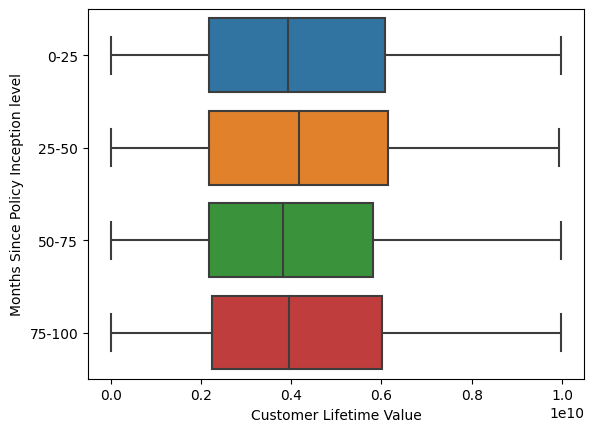

In [ ]:
# Create a boxplot of Customer Lifetime Value, broken down by Months Since Policy Inception level
sns.boxplot(data=df, x="Customer Lifetime Value", y="Months Since Policy Inception level")
plt.show()

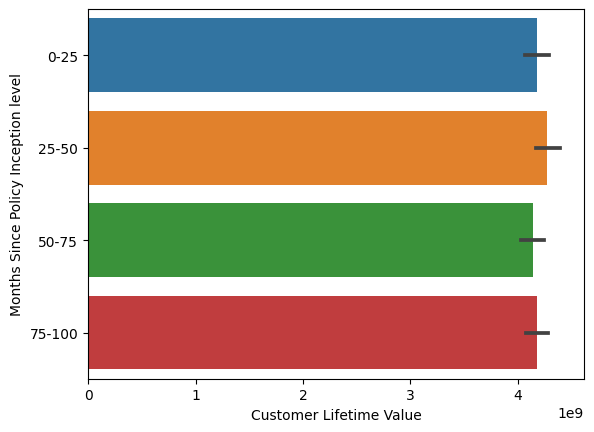

In [ ]:
# Create a bar plot of Customer Lifetime Value
sns.barplot(data=df, x="Customer Lifetime Value", y="Months Since Policy Inception level")
plt.show()

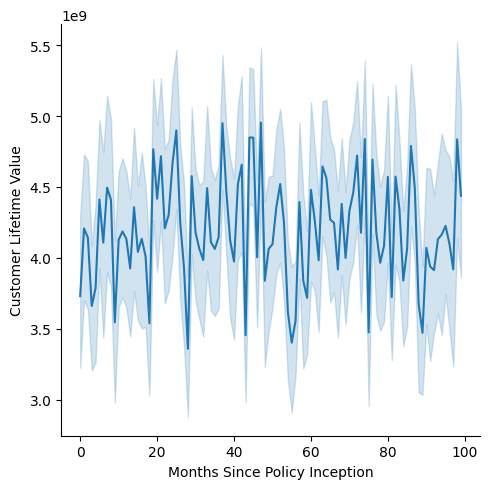

In [ ]:
# Create line plot
sns.relplot(x="Months Since Policy Inception",y="Customer Lifetime Value",data=df,kind="line")


# Show plot
plt.show()

###7.	show the distribution of the clv.

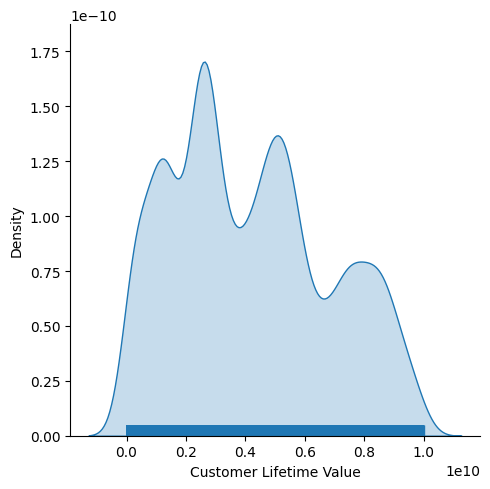

In [ ]:
# Create a displot of the Customer Lifetime Value
sns.displot(df['Customer Lifetime Value'],
             kind='kde',
             rug=True,
             fill=True)

# Plot the results
plt.show()

###8.	show procedure for months since policy inception and visualize these segments and comment these differences in a chart

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Customer                             9134 non-null   category      
 1   State                                9134 non-null   category      
 2   Customer Lifetime Value              9134 non-null   float64       
 3   Response                             9134 non-null   category      
 4   Coverage                             9134 non-null   category      
 5   Education                            9134 non-null   category      
 6   Effective To Date                    9134 non-null   datetime64[ns]
 7   EmploymentStatus                     9134 non-null   category      
 8   Gender                               9134 non-null   category      
 9   Income                               9134 non-null   int64         
 10  Location Cod

In [ ]:
Months_Since_Policy_by_Response = df.groupby("Months Since Policy Inception level")["Response"].value_counts()
print(Months_Since_Policy_by_Response)

Months Since Policy Inception level  Response
0-25                                 No          1918
                                     Yes          306
25-50                                No          2013
                                     Yes          312
50-75                                No          1846
                                     Yes          390
75-100                               No          1978
                                     Yes          288
Name: Response, dtype: int64


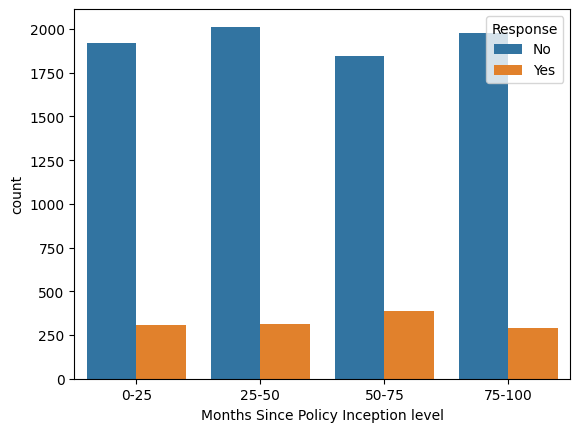

In [ ]:
# Plot the count of Months Since Policy Inception level broken by Response
sns.countplot(data=df, x="Months Since Policy Inception level", hue="Response")
plt.show()

###9.	Show all documentation of your procedures and comments.

https://colab.research.google.com/drive/1_2qnqUcPVnd2ERiVqELQAUlCCdhhWmMx#scrollTo=hZPFFX6FvzLr

###10.	Prepare a short story telling (use the tools you think relevant) to discuss your conclusions.

* California and Oregon represent the 62% percent of the market wich highlight the fact that cities like LA and Portalnd with high road infracstructure have an impact in vehicule policy sales compare with smaller States

* 58% percent of our customers are merried meaning that customers with a family household tends to aquired vehicule policies

* Our star product is the  personal auto L3 policy with 3426 customers and
72 % are from 4 doors vehicules our biggest positive response population

* 38 % of sales are made over call center the most efective sales chanel wich can imply 2 thing either customers will rather talk to an expert before purchasing a vehicule policy or there is a lack of information from the rest of chanel sales

* customers with more than 50 month since inception tends to have a positive response overtime

* there is a positive correlation betwen offer 1 and 4 doors vehicules wich represent a positive response from customers